In [1]:

#1. Data Collection 


import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(r"C:\Users\HP\Downloads\indian_liver_patient.csv")
print("Liver disease dataset loaded successfully!")
df.head(5)

df.columns = ['Total_Proteins' if col == 'Total_Protiens' else col for col in df.columns]
df.head(5)



Liver disease dataset loaded successfully!


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
import xgboost as xgb
import joblib
import os

In [3]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Proteins,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.shape

(583, 11)

Text(0.5, 0, 'Gender')

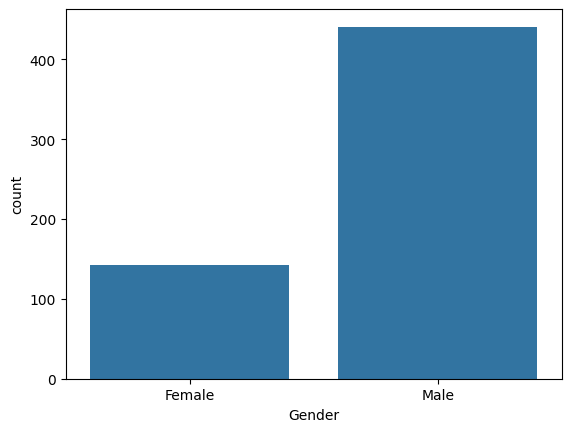

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.countplot(x=df['Gender'])
plt.xlabel("Gender")



In [5]:
def count(df):
    female_count=0
    male_count=0 
   

    for i in df['Gender']:
    
       if i =='Male':
            male_count=male_count+1
       else :
            female_count=female_count+1
    print("male count", male_count)
    print("female count", female_count)   
        
count(df)        
           



male count 441
female count 142


In [92]:
df['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male
...,...
578,Male
579,Male
580,Male
581,Male


# feature Engineering 

Handling Missing Values: Deciding how to fill in (impute) or remove data points where values are absent.

Encoding Categorical Features: Converting text-based categories (like 'Male', 'Female') into numerical representations that models can understand.

Feature Scaling: Adjusting the range of independent variables or features to a standard scale.

Outlier Treatment: Deciding how to handle extreme values that might disproportionately affect the model.

Feature Engineering: Creating new features from existing ones to improve model performance.



In [23]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [24]:
#handling missing value

df['Dataset'] = df['Dataset'].replace(2, 0)


print("\n--- Original DataFrame Info (before feature handling) ---")
print(df.info())
print("\n--- Original DataFrame Head ---")
print(df.head())



--- Original DataFrame Info (before feature handling) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int32  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 47.9 KB
None

--- Original DataFrame Head 

In [6]:
df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [7]:
# Check missing values
print(df.isnull().sum())

# Fill missing values (Albumin has 4 NaN values)
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3284\1953262206.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)


In [28]:
#Encoding 

df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [41]:
df.head(10).groupby('Gender')['Dataset'].sum()

Gender
Female    3
Male      6
Name: Dataset, dtype: int64

In [32]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [8]:
#lable encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Verify
print(df['Gender'].value_counts())

Gender
1    441
0    142
Name: count, dtype: int64


OUTLIER DETECTION AND TREATMENTS

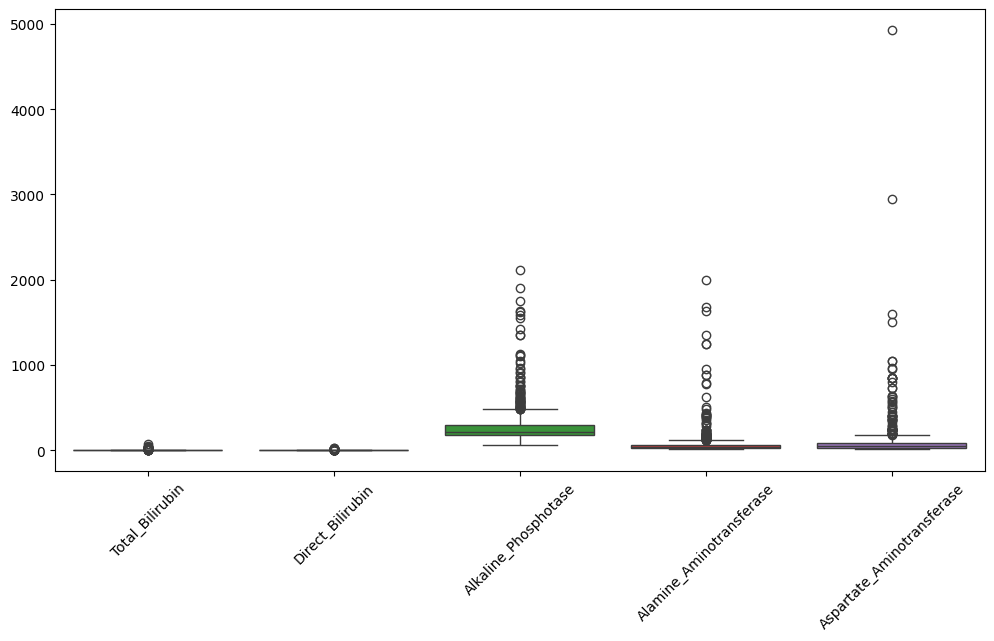

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                  'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.show()

In [95]:
#detect outlier
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers")

Total_Bilirubin: 84 outliers
Direct_Bilirubin: 81 outliers
Alkaline_Phosphotase: 69 outliers
Alamine_Aminotransferase: 73 outliers
Aspartate_Aminotransferase: 66 outliers


In [96]:
#handle outliers
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, 
                      np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df

for col in numerical_cols:
    df = cap_outliers(df, col)

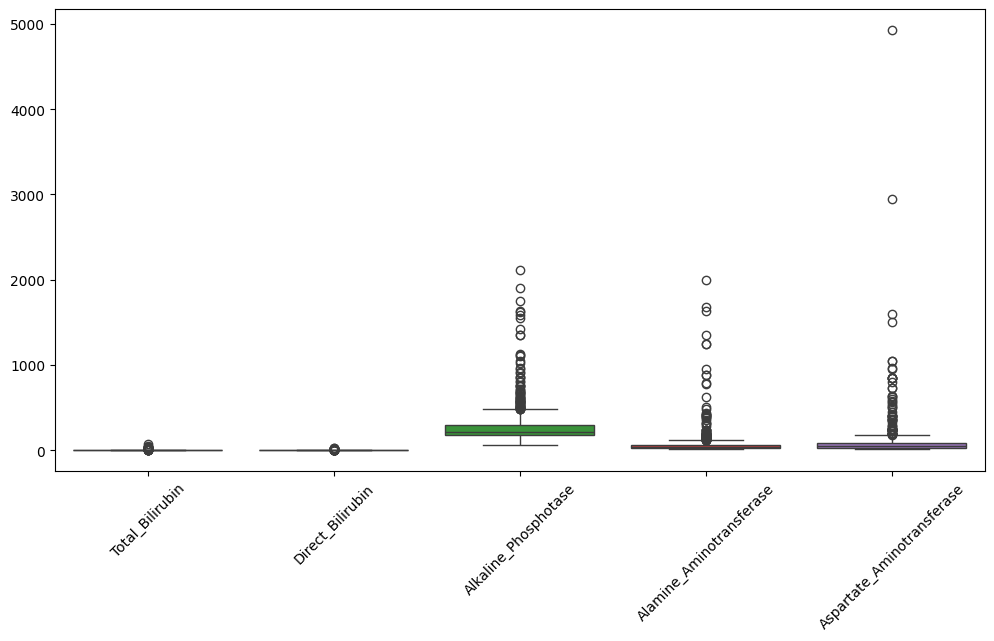

In [11]:
#verify the removal of outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.show()


In [12]:
#detect outlier
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers")

Total_Bilirubin: 84 outliers
Direct_Bilirubin: 81 outliers
Alkaline_Phosphotase: 69 outliers
Alamine_Aminotransferase: 73 outliers
Aspartate_Aminotransferase: 66 outliers


In [50]:
# --- Outlier Treatment Strategy Discussion ---
print("\n--- OUTLIER TREATMENT STRATEGY ---")
print("Outliers are data points that significantly differ from other observations.")
print("Common treatment options include:")
print("1. Removal: Removing outlier data points (use with caution, especially in medical datasets).")
print("2. Capping (Winsorization): Limiting extreme values to a certain percentile (e.g., 5th or 95th percentile).")
print("3. Transformation: Applying mathematical transformations (e.g., log, square root) to reduce skewness and compress outliers.")
print("4. Model Choice: Using models less sensitive to outliers (e.g., tree-based models like RandomForest, XGBoost, or Gradient Boosting).")
print("\nFor this project, given that XGBoost is relatively robust to outliers and removing medical data can be risky, we will proceed by primarily detecting them via visualization.")
print("We will NOT perform aggressive outlier removal or capping at this stage, but note their presence.")
print("If model performance is suboptimal, revisiting outlier treatment will be a key step.")



--- OUTLIER TREATMENT STRATEGY ---
Outliers are data points that significantly differ from other observations.
Common treatment options include:
1. Removal: Removing outlier data points (use with caution, especially in medical datasets).
2. Capping (Winsorization): Limiting extreme values to a certain percentile (e.g., 5th or 95th percentile).
3. Transformation: Applying mathematical transformations (e.g., log, square root) to reduce skewness and compress outliers.
4. Model Choice: Using models less sensitive to outliers (e.g., tree-based models like RandomForest, XGBoost, or Gradient Boosting).

For this project, given that XGBoost is relatively robust to outliers and removing medical data can be risky, we will proceed by primarily detecting them via visualization.
We will NOT perform aggressive outlier removal or capping at this stage, but note their presence.
If model performance is suboptimal, revisiting outlier treatment will be a key step.


STANDARD SCALIZATION

1. Why Use StandardScaler?
Normalization: Transforms features to have a mean=0 and std=1.

Impact: Essential for algorithms like SVM, Neural Networks, and distance-based models (KNN).

Exception: Tree-based models (Random Forest, XGBoost) don’t require scaling.

In [51]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Dataset', axis=1)  # Features
y = df['Dataset']              # Target

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform all features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.head())


        Age    Gender  Total_Bilirubin  Direct_Bilirubin  \
0  1.252098 -1.762281        -0.739010         -0.784798   
1  1.066637  0.567446         2.044134          2.083933   
2  1.066637  0.567446         2.044134          2.083933   
3  0.819356  0.567446        -0.557501         -0.482827   
4  1.684839  0.567446         1.197090          1.127689   

   Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  \
0             -0.587479                 -0.959220                   -0.873527   
1              2.107251                  0.484427                    0.655913   
2              2.107251                  0.364123                    0.059058   
3             -0.633191                 -1.019372                   -0.836224   
4             -0.514340                 -0.628384                   -0.108807   

   Total_Protiens   Albumin  Albumin_and_Globulin_Ratio  
0        0.292120  0.198969                   -0.147529  
1        0.937566  0.073157         

In [52]:
#Train and Test the dataset
from sklearn.model_selection import train_test_split

# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [53]:
#verify the scaling 
# Check mean (~0) and std (~1)
print("Mean (should be ~0):\n", X_train.mean())
print("\nStandard Deviation (should be ~1):\n", X_train.std())

Mean (should be ~0):
 Age                          -0.032993
Gender                        0.017511
Total_Bilirubin               0.011826
Direct_Bilirubin              0.008255
Alkaline_Phosphotase         -0.010673
Alamine_Aminotransferase      0.025446
Aspartate_Aminotransferase    0.032562
Total_Protiens                0.018270
Albumin                       0.023210
Albumin_and_Globulin_Ratio    0.035085
dtype: float64

Standard Deviation (should be ~1):
 Age                           0.967490
Gender                        0.990392
Total_Bilirubin               1.007363
Direct_Bilirubin              1.002020
Alkaline_Phosphotase          1.002899
Alamine_Aminotransferase      1.001177
Aspartate_Aminotransferase    1.014617
Total_Protiens                1.002675
Albumin                       0.998032
Albumin_and_Globulin_Ratio    1.022779
dtype: float64


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Verify
print(df['Gender'].value_counts())

Gender
1    441
0    142
Name: count, dtype: int64


In [26]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Dataset', axis=1)  # Features
y = df['Dataset']              # Target

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform all features
X_scaled = scaler.fit_transform(X)


In [27]:
#Train and Test the dataset
from sklearn.model_selection import train_test_split
X = df.drop('Dataset', axis=1)  # Features
y = df['Dataset']    

# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
stratify=y)

In [28]:
print("\n--- BUILDING AND TRAINING THE XGBOOST MODEL ---")


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
import xgboost as xgb


# Initialize XGBoost Classifier

liver_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    eval_metric='logloss',       # Evaluation metric during training
    use_label_encoder=False,     # Suppress deprecation warning
    n_estimators=100,            # Number of boosting rounds
    learning_rate=0.1,           # Step size shrinkage to prevent overfitting
    random_state=42              # For reproducibility
)

# Train the model
liver_xgb_model.fit(X_train, y_train)

print("XGBoost model training complete!")


--- BUILDING AND TRAINING THE XGBOOST MODEL ---


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [08:10:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model training complete!


In [30]:
# Make predictions on the test set
y_pred_liver = liver_xgb_model.predict(X_test)
y_prob_liver = liver_xgb_model.predict_proba(X_test)[:, 1] # Probability of liver disease (class 1)

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_liver)
precision = precision_score(y_test, y_pred_liver)
recall = recall_score(y_test, y_pred_liver)
f1 = f1_score(y_test, y_pred_liver)
roc_auc = roc_auc_score(y_test, y_prob_liver)
conf_matrix = confusion_matrix(y_test, y_pred_liver)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_liver) # For ROC plot

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_liver))

print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.7094
Precision: 0.7426
Recall: 0.9036
F1-Score: 0.8152
AUC-ROC: 0.7349

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        34
           1       0.74      0.90      0.82        83

    accuracy                           0.71       117
   macro avg       0.62      0.57      0.57       117
weighted avg       0.67      0.71      0.67       117


Confusion Matrix:
[[ 8 26]
 [ 8 75]]


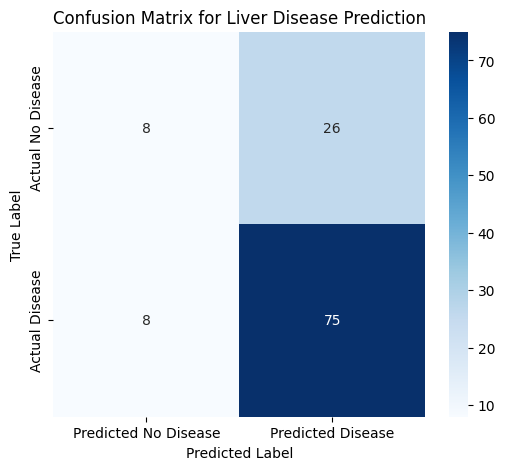

In [31]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Liver Disease Prediction')
plt.show()


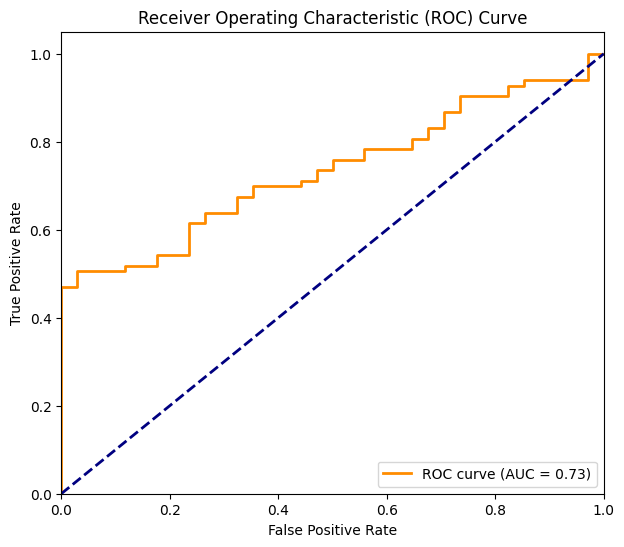

In [32]:
# Plot ROC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [33]:
#Hyperparameter Tuning (XGBoost Example)

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

grid = GridSearchCV(xgb.XGBClassifier(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
print("\n--- PERFORMING HYPERPARAMETER TUNING (GridSearchCV) ---")

# Initialize XGBoost Classifier with default parameters (will be tuned)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss' random_state=42)

# Define the parameter grid for GridSearchCV
# Keeping the grid small for demonstration purposes. For production, you might explore wider ranges.
param_grid = {
    'n_estimators': [50, 100, 200], # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 5, 7],         # Maximum depth of a tree
    'subsample': [0.7, 0.9],        # Subsample ratio of the training instance
    'colsample_bytree': [0.7, 0.9]  # Subsample ratio of columns when constructing each tree
}

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc', # Optimize for AUC-ROC score
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # Use all available CPU cores
    verbose=1          # Print progress messages
)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best estimator and its parameters
best_xgb_model = grid_search_xgb.best_estimator_
best_params = grid_search_xgb.best_params_

print("\n--- Hyperparameter Tuning Complete ---")
print(f"Best AUC-ROC Score during CV: {grid_search_xgb.best_score_:.4f}")
print(f"Best Parameters Found: {best_params}")



--- PERFORMING HYPERPARAMETER TUNING (GridSearchCV) ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

--- Hyperparameter Tuning Complete ---
Best AUC-ROC Score during CV: 0.7222
Best Parameters Found: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.9}


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [08:14:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


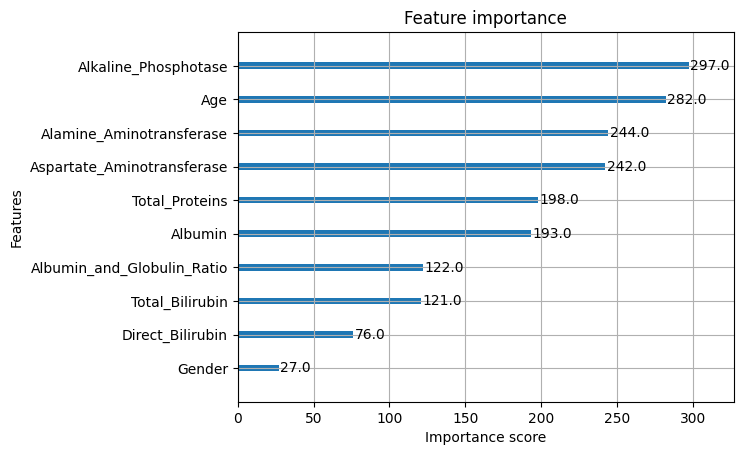

In [35]:
#. Feature Importance Analysis

import matplotlib.pyplot as plt

# For XGBoost
xgb.plot_importance(liver_xgb_model)
plt.show()



In [69]:
import joblib

# Save XGBoost model
joblib.dump(best_model, "liver_disease_xgb.pkl")

# Save scaler (to preprocess new data later)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV # Import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
import xgboost as xgb
import joblib
import os
df_liver=df

df_liver.columns = ['Total_Proteins' if col == 'Total_Protiens' else col for col in df_liver.columns]
# a) Missing Value Handling: Impute 'Albumin_and_Globulin_Ratio' with its median
imputer = SimpleImputer(strategy='median') # <-- imputer is defined here
df_liver['Albumin_and_Globulin_Ratio'] = imputer.fit_transform(df_liver[['Albumin_and_Globulin_Ratio']])
median_ag_ratio_imputed = imputer.statistics_[0]
# b) Label Encoding: 'Gender
label_encoder = LabelEncoder() # <-- label_encoder is defined here
df_liver['Gender'] = label_encoder.fit_transform(df_liver['Gender'])
gender_mapping = {label: encoded_val for encoded_val, label in enumerate(label_encoder.classes_)}

# Store preprocessing objects for saving
preprocessing_objects = {
    'imputer_ag_ratio': imputer,
    'scaler': scaler,
    'label_encoder_gender': label_encoder,
    'gender_mapping': gender_mapping
}

print("\n--- SAVING BEST MODEL AND PREPROCESSING OBJECTS ---")

# Create a directory to save the assets if it doesn't exist
save_dir = 'liver_disease_model_assets'
os.makedirs(save_dir, exist_ok=True)

# Save the best found model
joblib.dump(best_xgb_model, os.path.join(save_dir, 'liver_prediction_xgb_model.pkl'))
joblib.dump(preprocessing_objects['scaler'], os.path.join(save_dir, 'liver_scaler.pkl'))
joblib.dump(preprocessing_objects['imputer_ag_ratio'], os.path.join(save_dir, 'liver_imputer_ag_ratio.pkl'))
joblib.dump(preprocessing_objects['label_encoder_gender'], os.path.join(save_dir, 'liver_label_encoder_gender.pkl'))
joblib.dump(preprocessing_objects['gender_mapping'], os.path.join(save_dir, 'liver_gender_mapping.pkl'))

# Save evaluation metrics from the best model
liver_eval_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'conf_matrix': conf_matrix.tolist(),
    'fpr': fpr.tolist(),
    'tpr': tpr.tolist()
}
joblib.dump(liver_eval_metrics, os.path.join(save_dir, 'liver_model_evaluation_metrics.pkl'))

print(f"All liver disease model assets and evaluation metrics from the TUNED model saved to '{save_dir}' directory.")
print("Model building, tuning, and evaluation complete!")


--- SAVING BEST MODEL AND PREPROCESSING OBJECTS ---
All liver disease model assets and evaluation metrics from the TUNED model saved to 'liver_disease_model_assets' directory.
Model building, tuning, and evaluation complete!


In [111]:
df_liver.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [112]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.10,187.00,16.0,18.0,6.8,3.3,0.90,1
1,62,1,5.3,2.95,481.75,64.0,100.0,7.5,3.2,0.74,1
2,62,1,5.3,2.95,481.75,60.0,68.0,7.0,3.3,0.89,1
3,58,1,1.0,0.40,182.00,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,2.00,195.00,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.10,481.75,20.0,34.0,5.9,1.6,0.37,0
579,40,1,0.6,0.10,98.00,35.0,31.0,6.0,3.2,1.10,1
580,52,1,0.8,0.20,245.00,48.0,49.0,6.4,3.2,1.00,1
581,31,1,1.3,0.50,184.00,29.0,32.0,6.8,3.4,1.00,1


In [ ]:
#handling missing value

df['Dataset'] = df['Dataset'].replace(2, 0)


print("\n--- Original DataFrame Info (before feature handling) ---")
print(df.info())
print("\n--- Original DataFrame Head ---")
print(df.head())
#lable encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Verify
print(df['Gender'].value_counts())


#Train and Test the dataset
from sklearn.model_selection import train_test_split

# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n--- BUILDING AND TRAINING THE XGBOOST MODEL ---")


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
import xgboost as xgb


# Initialize XGBoost Classifier

liver_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    eval_metric='logloss',       # Evaluation metric during training
    use_label_encoder=False,     # Suppress deprecation warning
    n_estimators=200,            # Number of boosting rounds
    learning_rate=0.1,           # Step size shrinkage to prevent overfitting
    random_state=42              # For reproducibility
)

# Train the model
liver_xgb_model.fit(X_train, y_train)

print("XGBoost model training complete!")


# Make predictions on the test set
y_pred_liver = liver_xgb_model.predict(X_test)
y_prob_liver = liver_xgb_model.predict_proba(X_test)[:, 1] # Probability of liver disease (class 1)

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_liver)
precision = precision_score(y_test, y_pred_liver)
recall = recall_score(y_test, y_pred_liver)
f1 = f1_score(y_test, y_pred_liver)
roc_auc = roc_auc_score(y_test, y_prob_liver)
conf_matrix = confusion_matrix(y_test, y_pred_liver)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_liver) # For ROC plot

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_liver))

print("\nConfusion Matrix:")
print(conf_matrix)
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Liver Disease Prediction')
plt.show()
print("\n--- PERFORMING HYPERPARAMETER TUNING (GridSearchCV) ---")


xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],         
    'subsample': [0.7, 0.9],       
    'colsample_bytree': [0.7, 0.9]  
}

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc', 
    cv=5,              
    n_jobs=-1,        
    verbose=1          
)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best estimator and its parameters
best_xgb_model = grid_search_xgb.best_estimator_
best_params = grid_search_xgb.best_params_

print("\n--- Hyperparameter Tuning Complete ---")
print(f"Best AUC-ROC Score during CV: {grid_search_xgb.best_score_:.4f}")
print(f"Best Parameters Found: {best_params}")


In [ ]:
# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:,1]

# Find optimal threshold (you can adjust the beta value)
from sklearn.metrics import fbeta_score
thresholds = np.linspace(0,1,100)
f2_scores = [fbeta_score(y_test, (y_probs>t).astype(int), beta=0.5) for t in thresholds]
optimal_threshold = thresholds[np.argmax(f2_scores)]

# Use new threshold
y_pred_optimized = (y_probs > optimal_threshold).astype(int)


# Create interaction terms if using continuous features
df['Age_Bilirubin'] = df['Age'] * df['Total_Bilirubin']
df['Enzyme_Ratio'] = df['Alkaline_Phosphotase'] / (df['Alamine_Aminotransferase'] + 1e-6)

# Try polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Enhanced XGBoost with early stopping
xgb_improved = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=1000,  # Large number
    learning_rate=0.01,  # Smaller learning rate
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    scale_pos_weight=sum(y_train==0)/sum(y_train==1)  # Handle imbalance
)

xgb_improved.fit(X_train, y_train, 
                eval_set=[(X_test, y_test)],
                verbose=False)

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Create ensemble of models
estimators = [
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42))
]

ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_resampled, y_resampled)

# Apply Bayesian smoothing to predictions
from scipy.stats import beta
def bayesian_adjustment(probabilities, alpha=2, beta_param=2):
    return (probabilities * alpha + 1) / (alpha + beta_param)

y_probs_smoothed = bayesian_adjustment(y_probs)

In [ ]:
# First, let's fix the missing imports and data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           roc_curve, classification_report, fbeta_score)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# 1. Data Preparation
# Assuming df is your DataFrame with liver disease data
# Handle missing values if any
df = df.dropna()  # or use imputation

# Convert target variable (if needed)
df['Dataset'] = df['Dataset'].replace(2, 0)

# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Verify encoding
print("\nGender Distribution:")
print(df['Gender'].value_counts())

# Feature Engineering
# Create interaction terms and ratios
if 'Age' in df.columns and 'Total_Bilirubin' in df.columns:
    df['Age_Bilirubin'] = df['Age'] * df['Total_Bilirubin']
    
if 'Alkaline_Phosphotase' in df.columns and 'Alamine_Aminotransferase' in df.columns:
    df['Enzyme_Ratio'] = df['Alkaline_Phosphotase'] / (df['Alamine_Aminotransferase'] + 1e-6)

# Prepare features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# 2. Handle Class Imbalance
print("\nClass Distribution Before Resampling:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 4. Improved XGBoost Model
xgb_improved = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    random_state=42
)

xgb_improved.fit(X_train, y_train, 
                eval_set=[(X_test, y_test)],
                verbose=False)

# 5. Threshold Optimization
y_probs = xgb_improved.predict_proba(X_test)[:,1]
thresholds = np.linspace(0,1,100)
f2_scores = [fbeta_score(y_test, (y_probs>t).astype(int), beta=0.5) for t in thresholds]
optimal_threshold = thresholds[np.argmax(f2_scores)]
print(f"\nOptimal Threshold: {optimal_threshold:.4f}")

y_pred_optimized = (y_probs > optimal_threshold).astype(int)

# 6. Evaluation Function
def evaluate_model(y_true, y_pred, y_probs, model_name="Model"):
    print(f"\n--- {model_name} Performance ---")
    print(classification_report(y_true, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_probs):.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Evaluate improved model
evaluate_model(y_test, y_pred_optimized, y_probs, "Improved XGBoost")

# 7. Feature Importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_improved, max_num_features=15)
plt.title('Feature Importance')
plt.show()

# 8. Ensemble Model (Optional)
# Note: This may take longer to run
print("\nBuilding Ensemble Model...")
estimators = [
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42))
]

ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)

# Evaluate ensemble
y_pred_ensemble = ensemble.predict(X_test)
y_probs_ensemble = ensemble.predict_proba(X_test)[:,1]
evaluate_model(y_test, y_pred_ensemble, y_probs_ensemble, "Ensemble Model")

# 9. Bayesian Adjustment (Optional)
def bayesian_adjustment(probabilities, alpha=2, beta_param=2):
    return (probabilities * alpha + 1) / (alpha + beta_param)

y_probs_smoothed = bayesian_adjustment(y_probs)
y_pred_smoothed = (y_probs_smoothed > optimal_threshold).astype(int)
evaluate_model(y_test, y_pred_smoothed, y_probs_smoothed, "Bayesian Adjusted")

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             roc_curve, auc, classification_report, fbeta_score)
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import joblib
import os

# --- 1. Load and Prepare Data ---
df = pd.csv.read_csv(r"C:\Users\HP\Downloads\indian_liver_patient.csv")

# Handle missing values in target
initial_rows = len(df)
df.dropna(subset=['Dataset'], inplace=True)
print(f"Dropped {initial_rows - len(df)} rows with NaN in target")

# Fix column names and binary target
df.columns = ['Total_Proteins' if col == 'Total_Protiens' else col for col in df.columns]
df['Dataset'] = df['Dataset'].replace(2, 0)

# --- 2. Preprocessing ---
# Impute missing values
imputer = SimpleImputer(strategy='median')
num_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'Dataset']
for col in num_cols:
    if df[col].isnull().any():
        df[col] = imputer.fit_transform(df[[col]])

# Label Encoding for Gender
le = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = le.fit_transform(df['Gender'])

# Feature Engineering
if all(col in df.columns for col in ['Age', 'Total_Bilirubin']):
    df['Age_Bilirubin'] = df['Age'] * df['Total_Bilirubin']
if all(col in df.columns for col in ['Alkaline_Phosphotase', 'Alamine_Aminotransferase']):
    df['Enzyme_Ratio'] = df['Alkaline_Phosphotase'] / (df['Alamine_Aminotransferase'] + 1e-6)

# Prepare features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Scale numerical features
scaler = StandardScaler()
num_cols = [col for col in X.select_dtypes(include=np.number).columns if col != 'Gender']
X[num_cols] = scaler.fit_transform(X[num_cols])

# --- 3. Handle Class Imbalance ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# --- 4. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# --- 5. Random Forest Model ---
print("\n--- BUILDING RANDOM FOREST MODEL ---")

rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# --- 6. Hyperparameter Tuning for Random Forest ---
print("\n--- TUNING RANDOM FOREST ---")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best RF params: {grid_search_rf.best_params_}")

# --- 7. Threshold Optimization ---
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0, 1, 100)
optimal_idx = np.argmax([fbeta_score(y_test, (y_probs_rf > t).astype(int), beta=0.5) for t in thresholds])
optimal_threshold = thresholds[optimal_idx]
y_pred_optimized = (y_probs_rf > optimal_threshold).astype(int)

# --- 8. Evaluation ---
def evaluate_model(y_true, y_pred, y_probs, model_name):
    print(f"\n--- {model_name} Performance ---")
    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show() # This will display the plot in Jupyter

    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('ROC Curve')
    plt.legend()
    plt.show() # This will display the plot in Jupyter
    
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'auc': auc_score
    }

rf_metrics = evaluate_model(y_test, y_pred_optimized, y_probs_rf, "Tuned Random Forest")

# --- 9. Feature Importance ---
plt.figure(figsize=(10,6))
importances = best_rf.feature_importances_
sorted_idx = np.argsort(importances)[-15:]  # Show top 15 features
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.show() # This will display the plot in Jupyter

# --- 10. Ensemble Model (RF + SVM) ---
print("\n--- BUILDING ENSEMBLE (RF + SVM) ---")

estimators = [
    ('rf', best_rf),
    ('svm', SVC(probability=True, kernel='rbf', C=0.1, random_state=42)) # Make sure C=0.1 is your desired hyperparameter
]

ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)

# Evaluate ensemble
y_probs_ensemble = ensemble.predict_proba(X_test)[:, 1]
# Note: Using the same optimal_threshold found for RF. Consider optimizing for ensemble if performance is critical.
y_pred_ensemble = (y_probs_ensemble > optimal_threshold).astype(int)
ensemble_metrics = evaluate_model(y_test, y_pred_ensemble, y_probs_ensemble, "Ensemble (RF+SVM)")

# --- 11. Save Models and Evaluation Metrics ---
save_dir = 'liver_disease_model_assets'
os.makedirs(save_dir, exist_ok=True) # Ensure the directory exists

# Save your models
joblib.dump(best_rf, os.path.join(save_dir, 'liver_prediction_rf_model.pkl'))
joblib.dump(ensemble, os.path.join(save_dir, 'liver_prediction_ensemble_model.pkl'))

# Save preprocessing objects
joblib.dump({
    'imputer': imputer,
    'scaler': scaler,
    'label_encoder': le,
    'optimal_threshold': optimal_threshold,
    'feature_columns': X.columns.tolist() # It's good practice to save feature columns
}, os.path.join(save_dir, 'liver_preprocessing.pkl'))

# --- ADDED CODE TO SAVE EVALUATION METRICS ---
joblib.dump(rf_metrics, os.path.join(save_dir, 'liver_model_evaluation_metrics.pkl'))
joblib.dump(ensemble_metrics, os.path.join(save_dir, 'liver_ensemble_evaluation_metrics.pkl')) # Optional: save ensemble metrics too

print("\n--- MODELS AND EVALUATION METRICS SAVED SUCCESSFULLY ---")

# --- End of your code ---

ImportError: cannot import name 'intp' from 'numpy._core' (c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\__init__.py)

In [41]:

!pip install --force-reinstall --no-cache-dir matplotlib
!pip install --force-reinstall --no-cache-dir pandas
!pip install --force-reinstall --no-cache-dir numpy
!pip install --force-reinstall --no-cache-dir seaborn
!pip install --force-reinstall --no-cache-dir joblib
!pip install --force-reinstall --no-cache-dir scikit-learn
!pip install --force-reinstall --no-cache-dir imblearn
!pip install --force-reinstall --no-cache-dir streamlit
!pip install --force-reinstall --no-cache-dir Pillow

Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\hp\\appdata\\roaming\\python\\python313\\site-packages\\numpy\\polynomial\\hermite_e.py'
Check the permissions.




   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 4.8 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 4.8 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.8 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.8 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.2 MB 4.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.2 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.8 MB/s eta 0:00:00
   ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  ERROR: Failed to restore c:\users\hp\appdata\roaming\python\python313\site-packages\numpy\
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python313\\site-packages\\numpy-2.3.0.dist-info\\INSTALLER94d9vszq.tmp'



Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.
streamlit 1.46.0 requires pandas<3,>=1.4.0, which is not installed.



   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.7 MB 3.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/12.7 MB 4.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.9/12.7 MB 4.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.7 MB 4.7 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.7 MB 4.7 MB/s eta 0:00:02
   ------------------ --------------------- 5.8/12.7 MB 4.7 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.7 MB 4.5 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.7 MB 4.5 MB/s eta 0:00:02
   ---------------------------- ----------- 8.9/12.7 MB 4.6 MB/s eta 0:00:01
   ------------------------------- -------- 10.0/12.7 MB 4.6 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.7 MB 4.6 MB/s eta 0:00:01
   -------------------------------------- - 12.3/12.7 MB 4.6 MB/s eta 0:00:01
  

ERROR: Could not install packages due to an OSError: [('c:\\users\\hp\\appdata\\roaming\\python\\python313\\site-packages\\numpy\\typing\\tests\\data\\pass\\__pycache__\\lib_user_array.cpython-313.pyc.2449069304352', 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python313\\site-packages\\numpy\\~yping\\tests\\data\\pass\\__pycache__\\lib_user_array.cpython-313.pyc.2449069304352', '[WinError 2] The system cannot find the file specified')]



Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 4.7 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/10.7 MB 4.8 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.7 MB 4.8 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.7 MB 4.6 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.7 MB 4.8 MB/s eta 0:00:02
   ------------------------ --------------- 6.6/10.7 MB 4.8 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.7 MB 4.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 4.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---- ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python313\\site-packages\\numpy-2.3.0.dist-info\\INSTALLERm6a604xo.tmp'



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
    --------------------------------------- 0.3/12.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.7 MB 1.9 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/12.7 MB 1.8 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/12.7 MB 1.9 MB/s eta 0:00:06
   ----- ---------------------------------- 1.8/12.7 MB 1.9 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.7 MB 2.0 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.7 MB 1.9 MB/s eta 0:00:06
   --------- ------------------------------ 3.1/12.7 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.7/12.7 MB 1.9 MB/s eta 0:00:05
   ------------ --------------------------- 3.9/12.7 MB 1.9 MB/s eta 0:00:05
   -------------- ------------------------- 4.5/12.7 MB 1.9 MB/s eta 0:00:05
   ---------

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-unpack-mttwp455\\scikit_learn-1.6.1-cp313-cp313-win_amd64.whl'
Check the permissions.



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.1 MB 3.5 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/10.1 MB 4.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/10.1 MB 4.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/10.1 MB 4.7 MB/s eta 0:00:02
   ------------------- -------------------- 5.0/10.1 MB 4.8 MB/s eta 0:00:02
   ----------------------- ---------------- 6.0/10.1 MB 4.8 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/10.1 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/10.1 MB 4.8 MB/s eta 0:00:01
   ----------------------------------- ---- 8.9/10.1 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bar-chart-race 0.1.0 requires matplotlib>=3.1, which is not installed.
xgboost 3.0.2 requires scipy, which is not installed.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 4.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\hp\\appdata\\roaming\\python\\python313\\site-packages\\pil\\tiffimageplugin.py'
Check the permissions.

